<h1>Text Summarization, Document Similarity, Topic Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<h2>Prepare restaurant corpus</h2>

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/community"
le_monde_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('shakeshack',shakeshack_data.raw()), ('fiveguys',fiveguys_data.raw())]

<h2>Import nltk corpora</h2>

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<h2>Load the inaugural address corpus</h2>

In [4]:
all_addresses = list()
for file in inaugural.fileids():
    all_addresses.append((file,inaugural.raw(file)))


<h2>Text summarization</h2>
<li>Text summarization is useful because you can generate a short summary of a large piece of text automatically
<li>Then, these summaries can serve as an input into a topic analyzer to figure out what the main topic of the text is
<li>Text summarization typically selects "important" sentences and reports these sentences as a summary

A naive form of summarization is to identify the most frequent words in a piece of text and use the occurrence of these words in sentences to rate the importance of a sentence. 

<h4>First the imports</h4>

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

<h4>Then prep the text. Get did of end of line chars</h4>

In [6]:
text = community_data.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

<h4>Construct a list of words after getting rid of unimportant ones and numbers</h4>

In [7]:
words = word_tokenize(striptext)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]


<h4>Construct word frequencies and choose the most common n (20)</h4>

In [8]:
word_frequencies = FreqDist(lowercase_words)
most_frequent_words = FreqDist(lowercase_words).most_common(20)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(most_frequent_words)

[   ('i', 73),
    ('the', 46),
    ('food', 20),
    ('brunch', 20),
    ('good', 19),
    ('place', 15),
    ('nice', 13),
    ('ordered', 13),
    ('pancakes', 13),
    ('fresh', 13),
    ('came', 13),
    ('my', 12),
    ('coffee', 12),
    ('delicious', 12),
    ('we', 10),
    ('community', 10),
    ('eggs', 10),
    ('friend', 10),
    ('one', 10),
    ('get', 9)]


<h4>Initializations</h4>
<li>candidate_sentences is a dictionary with the original sentence as the key, and its lowercase version as the value
<li>summary_sentences is a list containing the sentences that will be included in the summary
<li>candidate_sentence_counts is a dictionary with the original sentence as the key, and the sum of the frequencies of each word in the sentence as the value


In [9]:
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}

In [10]:
sentences = sent_tokenize(striptext)
for sentence in sentences:
    candidate_sentences[sentence] = sentence.lower()
candidate_sentences

{'"I have a degree from Columbia, and now I have to get one from America."': '"i have a degree from columbia, and now i have to get one from america."',
 '- Jeff Winger, Community.': '- jeff winger, community.',
 '- The truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.': '- the truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.',
 '- Troy Barnes Man I love that show.': '- troy barnes man i love that show.',
 '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.': '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.',
 '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!': '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!',
 '2 HOURS AND NO FOOD!': '2 hours and no food!',
 "A man came over to the table and filled our waters but didn't introduce himself as our waiter so I wasn't sure if he 

In [11]:
for upper, lower in candidate_sentences.items():
    count = 0
    for freq_word, frequency_score in most_frequent_words:
        if freq_word in lower:
            count += frequency_score
            candidate_sentence_counts[upper] = count

<h4>sort the sentences by candidate_sentence_count</h4>
<li>And pick the top ranked sentences</li>

In [12]:
candidate_sentence_counts

{'"I have a degree from Columbia, and now I have to get one from America."': 92,
 '- Jeff Winger, Community.': 83,
 '- The truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.': 119,
 '- Troy Barnes Man I love that show.': 73,
 '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.': 73,
 '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!': 129,
 '2 HOURS AND NO FOOD!': 20,
 "A man came over to the table and filled our waters but didn't introduce himself as our waiter so I wasn't sure if he was the busboy or the waiter; regardless, he took our drink order.": 132,
 'All and all a solid meal, the burger was a wee bit dry, but cooked to my specifications (medium rare).': 141,
 'All in all, a pleasant experience with nice service and nice company.': 86,
 'All the food was amazing.': 139,
 "Also super close to Colombia's main campus, great place to walk around and digest.": 88,
 "Although we tho

In [13]:
sorted_sentences = OrderedDict(sorted(
                    candidate_sentence_counts.items(),
                    key = lambda x: x[1],
                    reverse = True)[:4])
pp.pprint(sorted_sentences)

OrderedDict([   (   "I've come here several times with a friend for brunch and "
                    "once for dinner -- we've both really enjoyed a lot of the "
                    'breakfast foods available; my favorite is the brioche '
                    'French toast with blackberry and lemon curd & she loves '
                    'heir waffles.',
                    191),
                (   'There are a lot of nice places in the city where you can '
                    'get a very good breakfast for 1/3rd to 1/2 less than '
                    'Community.',
                    185),
                (   'Came here for brunch with my wife after she found the '
                    'good review, and it did not disappoint!',
                    183),
                (   'The beans were seasoned perfectly, as was the rest of the '
                    'tomato sauce, The tortilla was fresh and soft, and it '
                    'came with delicious guacamole and sour cream.',
          

In [58]:
'\n'.join(sorted_sentences)

"I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.\nThere are a lot of nice places in the city where you can get a very good breakfast for 1/3rd to 1/2 less than Community.\nCame here for brunch with my wife after she found the good review, and it did not disappoint!\nThe beans were seasoned perfectly, as was the rest of the tomato sauce, The tortilla was fresh and soft, and it came with delicious guacamole and sour cream."

<h4>Packaging all this into a function</h4>


In [14]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
                candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences   

In [15]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
There are a lot of nice places in the city where you can get a very good breakfast for 1/3rd to 1/2 less than Community.
Came here for brunch with my wife after she found the good review, and it did not disappoint!
The beans were seasoned perfectly, as was the rest of the tomato sauce, The tortilla was fresh and soft, and it came with delicious guacamole and sour cream.


In [16]:
summary = '\n'.join(build_naive_summary(le_monde_data.raw()))
print(summary)

i would recommend going for brunch over any other meal, as everything i've ordered for brunch has been quite good the shakshuka is great, and you can't anything else like it in the area.
I would love to try them out for dinner, as I said, the service was great and we were checked on regularly.
I would give them a better review because the food was good but the waiting really was long.
The food was really good and they are known for their brunch menu.


<h4>We can summarize George Washington's first inaugural speech<h4>

In [60]:
pp.pprint('\n'.join(build_naive_summary(inaugural.raw('1789-Washington.txt'))))


('I dwell on this prospect with every satisfaction which an ardent love for my '
 'country can inspire, since there is no truth more thoroughly established '
 'than that there exists in the economy and course of nature an indissoluble '
 'union between virtue and happiness; between duty and advantage; between the '
 'genuine maxims of an honest and magnanimous policy and the solid rewards of '
 'public prosperity and felicity; since we ought to be no less persuaded that '
 'the propitious smiles of Heaven can never be expected on a nation that '
 'disregards the eternal rules of order and right which Heaven itself has '
 'ordained; and since the preservation of the sacred fire of liberty and the '
 'destiny of the republican model of government are justly considered, '
 'perhaps, as deeply, as finally, staked on the experiment entrusted to the '
 'hands of the American people.\n'
 'Such being the impressions under which I have, in obedience to the public '
 'summons, repaired to the pr

<h2>gensim: another text summarizer</h2>
<li>Gensim uses a network with sentences as nodes and 'lexical similarity' as weights on the arcs between nodes<p>


In [18]:
!pip install gensim

You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
import gensim.summarization

In [20]:
type(community_data)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

<h4>Initialize variables and clean data</h4>

In [62]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [64]:
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)

We each ordered blueberry pancakes and a cup of coffee--no fresh fruit, no juice, no bacon.
I started with a raspberry iced tea & ordered the community custom egg white omelette with sautéed spinach & mushrooms and a side of smoked salmon.
I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
This place is really good for breakfast and has great pancakes, sausages, eggs.


In [23]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
There are a lot of nice places in the city where you can get a very good breakfast for 1/3rd to 1/2 less than Community.
Came here for brunch with my wife after she found the good review, and it did not disappoint!
The beans were seasoned perfectly, as was the rest of the tomato sauce, The tortilla was fresh and soft, and it came with delicious guacamole and sour cream.


In [24]:
print(gensim.summarization.keywords(striptext,words=10))

brunch
nice
food
foods
egg
eggs
good
sauced
sauce
sauces
fresh
communal
community
pancakes
pancake
little


<h3>Comparing Trump's inaugural speech using the two methods</h3>

In [25]:
text = inaugural.raw('2017-Trump.txt')
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)
#print(gensim.summarization.keywords(striptext,words=10))

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world, thank you.
We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people.
Americans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves.
At the bedrock of our politics will be a total allegiance to the United States of America, and through our loyalty to our country, we will rediscover our loyalty to each other.
In America, we understand that a nation is only living as long as it is striving.


In [26]:
summary = '\n'.join(build_naive_summary(inaugural.raw('2017-Trump.txt')))
print(summary)

We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people.
We will get our people off of welfare and back to work, rebuilding our country with American hands and American labor.
One by one, the factories shuddered and left our shores, with not even a thought about the millions and millions of American workers that were left behind.
We all enjoy the same glorious freedoms, and we all salute the same, great American flag.


<h1>Topic modeling</h1>
<li>The goal of topic modeling is to identify the major concepts underlying a piece of text
<li>Topic modeling uses "Unsupervised Learning". No a-priori knowledge is necessary
<li>Though, without a-priori knowledge, your results are unlikely to be good!

<h3>LDA: Latent Dirichlet Allocation Model</h3>
<li>Identifies potential topics using pruning techniques like 'upward closure'
<li>Computes conditional probabilities for topic word sets
<li>Identifies the most likely topics
<li>Does this over multiple passes probabilistically picking topics in each pass
<li>Good intuitive explanation: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

<h2>LDA: Latent Dirichlet Allocation</h2>
<li>A technique for topic modeling
<li>Basic assumptions:
<ol>
<li>Every document will be associated with a set of topics 
<li>The topics will be distributed across a probability distribution
<li>Each topic will be represented in the document by a set of words
<li>The words associated with the topic will be distributed across a probability distribution
</ol>
<li>Given these assumptions, LDA scans the document and tries to deduce the topic and word distributions

<h3>Example</h3>
<li>We'll look at the political news stories on slate.com
<li>See what topics they cover


<li>Generate a list of story links
<li>Get the stories and store in a document set

In [95]:
import requests
from bs4 import BeautifulSoup
url="https://www.slate.com"
page = requests.get(url)
bs_page = BeautifulSoup(page.content,'lxml')
all_links = bs_page.find_all('a')
categories = ['news_and_politics','news-and-politics']
followable_links = list()
for link in all_links:
    href = link.get('href')
    if href:
        for cat in categories:
            if cat in href:
                followable_links.append(href)
print(len(followable_links))

41


/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)


In [28]:
# followable_links

In [96]:
story_list = list()
count=0
for link in followable_links:
    try:
        page=BeautifulSoup(requests.get(link).content,'lxml')
        text=page.find('body').find('section',class_='article__body').get_text().strip()
        story_list.append(text)
        count+=1
    except:
        continue
# print(count)       
        

/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
/home/uday/anaconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or in

<h2>imports for LDA</h2>

In [30]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

<h4>Prepare the text</h4>

<h4>prepare the text</h4>
<li>Clean it (remove numbers, end of line characters, common words)
<li>Sentence tokenize it
<li>Convert each sentence into a list of words


In [97]:
for i in range(len(story_list)):
    story = story_list[i]
    sents = sent_tokenize(story)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    story_list[i] = '. '.join(sents)
# story_list[0]

In [119]:
# story_list

<li>Each document is converted into a list of words

In [100]:

texts = [[word for word in story.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']
        for story in story_list]



In [117]:
# texts

<h4>Create a (word,frequency) dictionary for each word in the text</h4>
<li>dictionary: key = word, value = integer (a unique number attached to each word). corpora.Dictionary generates this.
<li>corpus: A list of (word index, frequency) pairs for each text. doc2bow generates this

In [103]:
dictionary = corpora.Dictionary(texts) #(word_id,word) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
#print(dictionary.token2id)
#print(dictionary.keys())
#print(corpus[3])
#print(texts[3])
#print(dictionary[37])
#dictionary[4]


In [104]:
# for k,v in dictionary.items():
#     print (k,v)

<h2>Do the LDA</h2>

<h4>Parameters:</h4>
<li>Number of topics: The number of topics you want generated. 
<li>Passes: The LDA model makes through the document. More passes, slower analysis
<ol>
<li>LDA first randomly assigns words and word weights to each topic
<li>In each pass, it refines the weights
<li>In short, you want the number of passes to be wherever the gain (improved weights) is minimal

In [35]:
#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10

In [105]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/uday/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

<h4>See results</h4>
<li>We get a set of candidate topics in the form of words
<li>It is up to us to make sense of the words

In [106]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.014*"north" + 0.014*"state" + 0.011*"carolina" + 0.010*"court" + '
        '0.009*"police" + 0.009*"lawmakers" + 0.008*"voting" + '
        '0.007*"congressional"'),
    (   1,
        '0.023*"trump" + 0.010*"percent" + 0.008*"house" + 0.008*"ukraine" + '
        '0.008*"white" + 0.007*"impeachment" + 0.006*"president" + '
        '0.006*"security"'),
    (   2,
        '0.021*"hong" + 0.011*"kong" + 0.010*"facebook" + 0.009*"government" + '
        '0.007*"james" + 0.007*"chinese" + 0.007*"political" + 0.007*"ad"'),
    (   3,
        '0.012*"biden" + 0.008*"work" + 0.008*"debate" + 0.008*"support" + '
        '0.007*"2020" + 0.007*"hunter" + 0.007*"saïed" + 0.007*"new"'),
    (   4,
        '0.021*"treaty" + 0.017*"atlantic" + 0.016*"north" + '
        '0.013*"principles" + 0.009*"nato" + 0.009*"suspension" + '
        '0.008*"provision" + 0.008*"member"')]


In [107]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)


[(1, 0.99658716),
 (2, 0.0008544839),
 (0, 0.0008540247),
 (3, 0.0008534872),
 (4, 0.00085083494)]

In [120]:
texts[0]

['white',
 'house',
 'national',
 'security',
 'advisor',
 'john',
 'bolton',
 'pushed',
 'hard',
 'president',
 'pressure',
 'campaign',
 'ukrainian',
 'chip',
 'images',
 'popular',
 'news',
 'politics',
 'trump',
 'irreparable',
 'damage',
 'standing',
 'shepard',
 'smith',
 'told',
 'truth',
 'audience',
 'desperately',
 'needed',
 'hear',
 'quid',
 'pro',
 'words',
 'quid',
 'pro',
 'loud',
 'unshrinkable',
 'core',
 'support',
 'shrinkable',
 'hours',
 'testimony',
 'monday',
 'senior',
 'national',
 'security',
 'council',
 'official',
 'painted',
 'picture',
 'president',
 'trump',
 'sitting',
 'atop',
 'shadow',
 'foreign',
 'policy',
 'initiative',
 'coerce',
 'ukraine',
 'political',
 'butting',
 'heads',
 'wider',
 'circle',
 'white',
 'house',
 'officials',
 'viewed',
 'rudy',
 'freelancing',
 'wrong',
 'likely',
 'testimony',
 'fiona',
 'senior',
 'director',
 'european',
 'russian',
 'depicted',
 'advisers',
 'outside',
 'giuliani',
 'vortex',
 'alarmed',
 'group',
 'inc

<h2>Using the results</h2>
<li>When a new document comes in
<li>See which topic(s) it matches


In [40]:
newdoc = """
President Trump broke with his own intelligence agencies on Friday, appearing to accept Saudi Arabia’s explanation that the journalist Jamal Khashoggi was killed by accident during a fistfight, while the United States’ spy agencies are increasingly convinced that he was assassinated on high-level orders from the Saudi royal court.

Mr. Trump, who has cultivated Crown Prince Mohammed bin Salman and made Saudi Arabia the linchpin of his Middle East strategy, has been deeply reluctant to point a finger at the prince, despite evidence linking him to Saudi operatives who entered the country’s consulate in Istanbul the same day that Mr. Khashoggi disappeared there.

Asked during a visit to an Air Force base in Arizona whether he viewed the Saudi explanation as credible, Mr. Trump said, “I do.”

[Jamal Khashoggi is dead. Here is everything we know so far.]

The president said he still had questions for Prince Mohammed, and he called the killing of Mr. Khashoggi “unacceptable.” Mr. Trump also raised the possibility of sanctions against Saudi Arabia, but said that he hoped that Congress would not try to block billions of dollars in weapons sales to the kingdom, which he has held up as proof of the fruits of the alliance.

Mr. Trump’s response sets up a clash with Congress, where Republicans and Democrats both tarred the Saudi explanation as lacking credibility. A senior lawmaker briefed on American intelligence assessments of the circumstances surrounding Mr. Khashoggi’s death, and the likely culprits, said it was not consistent with the Saudi account.

The lawmaker, Representative Adam B. Schiff of California, the senior Democrat on the House Intelligence Committee, said, “The kingdom and all involved in this brutal murder must be held accountable, and if the Trump administration will not take the lead, Congress must.”

Senator Lindsey Graham, Republican of South Carolina and a close ally of Mr. Trump’s, declared in a Twitter post, “To say that I am skeptical of the new Saudi narrative about Mr. Khashoggi is an understatement.” He added, “It’s hard to find this latest ‘explanation’ as credible.”

The growing evidence that Mr. Khashoggi, a Virginia resident and a columnist for The Washington Post, was killed on orders from the Saudi royal family has put Mr. Trump in an increasingly untenable position.

On Friday evening, the president praised the statement issued by the Saudi government, which confirmed Mr. Khashoggi’s death, as a “good first step” and a “big step.” Earlier, the prince and other senior Saudi officials had denied any role in Mr. Khashoggi’s disappearance.

Editors’ Picks

11 Takeaways From The Times’s Investigation Into Trump’s Wealth

50 Years Later, It Feels Familiar: How America Fractured in 1968

How to Buy a Gun in 15 Countries
Secretary of State Mike Pompeo spoke with Prince Mohammed by phone on Friday evening and then briefed Mr. Trump and his national security adviser, John R. Bolton, according to a White House spokesman.

“I think we’re getting close to solving a big problem,” Mr. Trump told reporters at the Luke Air Force Base, where he was shown an Apache helicopter, an F-35 fighter jet and an array of bombs.

Image
Representative Adam B. Schiff of California, the top Democrat on the House Intelligence Committee, in May on Capitol Hill. He was among the lawmakers who tarred the explanation by Saudi Arabia as lacking credibility.CreditTom Brenner/The New York Times
For the president, Saudi Arabia has become a key ally but also a troublesome partner. Saudi support is critical to his efforts to isolate Iran. But he has watched as Prince Mohammed pursued a deadly war in Yemen, carried on a feud with his neighbor Qatar, jailed female dissidents and detained hundreds of wealthy Saudis.

Mr. Trump’s son-in-law and senior adviser, Jared Kushner, cultivated a relationship with the prince, who is close to him in age and who Mr. Kushner hoped would be an advocate for his peace proposal between Israel and the Palestinians.

In internal discussions, Mr. Kushner has urged the president and his aides not to abandon Prince Mohammed. But as Turkish officials leaked details of the grisly killing of Mr. Khashoggi and of the dismemberment of his body, the White House has become increasingly isolated in its defense of Saudi Arabia.

A stream of prominent Wall Street and tech executives canceled plans to attend an investor conference convened by the prince next week in Riyadh, the Saudi capital. On Thursday, Steven Mnuchin, the Treasury secretary, pulled out of the conference, as well, though he will attend a separate meeting on counterterrorism strategy.

In an interview on Thursday with The New York Times, Mr. Trump acknowledged that the furor over Mr. Khashoggi’s death had mushroomed into one of the biggest foreign policy crises of his presidency.

“This one has caught the imagination of the world, unfortunately,” Mr. Trump said. “It’s not a positive. Not a positive.”

The president also said on Thursday that it was still “a little bit early” in the process to draw definitive conclusions about who ordered the killing. But he expressed no doubt that the truth would come out soon.

“We’re working with the intelligence from numerous countries,” he said, adding, “This is the best intelligence we could have.”

On Wednesday, The Times reported that American intelligence officials were increasingly convinced that Prince Mohammed is culpable in Mr. Khashoggi’s death, and that they were preparing an appraisal for the White House.

Saudi Arabia tried to project the idea of a housecleaning, announcing that Saud al-Qahtani, a close aide to the crown prince; Maj. Gen. Ahmed al-Assiri, the deputy director of Saudi intelligence; and other high-ranking intelligence officials had been dismissed.

For Mr. Trump, who is on a three-day swing in the West before the midterm elections, the Khashoggi affair has become a distraction during a period in which he had hoped to campaign for Republican congressional candidates on a message of economic growth and the recent confirmation of Justice Brett M. Kavanaugh to the Supreme Court.

Just after answering questions about the Saudi announcement, Mr. Trump flew to a “Make America Great Again” rally in Mesa, Ariz.


"""

In [109]:
# newdoc

<li>Clean and set up the text
<li>Create corpus

In [110]:
text = newdoc
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
new_text = [nltk.word_tokenize(striptext)]

textdictionary = corpora.Dictionary(new_text) #(word_id,frequency) pairs
corpus_new = [dictionary.doc2bow(text) for text in new_text] #(word_id,freq) pairs by sentence

<h2>Matching topics to documents</h2>
<li>We now have a corpus with one document
<li>Get the topics using the results of the lda we ran before 
<li>And see which topic(s) are the best matches

In [111]:
from operator import itemgetter
lda.get_document_topics(corpus_new[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus_new[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(1, 0.431621),
 (0, 0.23581353),
 (2, 0.11365976),
 (4, 0.11127618),
 (3, 0.1076295)]

In [112]:
lda.print_topic(topicno=1)

'0.023*"trump" + 0.010*"percent" + 0.008*"house" + 0.008*"ukraine" + 0.008*"white" + 0.007*"impeachment" + 0.006*"president" + 0.006*"security" + 0.006*"bolton" + 0.006*"pro"'

In [123]:
lda.show_topic(1)

[('trump', 0.022529168),
 ('percent', 0.01022862),
 ('house', 0.00845207),
 ('ukraine', 0.008306217),
 ('white', 0.008277227),
 ('impeachment', 0.0068864003),
 ('president', 0.0064379214),
 ('security', 0.0063356766),
 ('bolton', 0.00631264),
 ('pro', 0.005702181)]

<h4>Draw wordclouds</h4>
<li>to better understand the topic we can draw wordclouds weighted by the weight of the terms in the topic

In [137]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
#         freq = int(prob/prob_total*1000)
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
#     print(word_list)
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

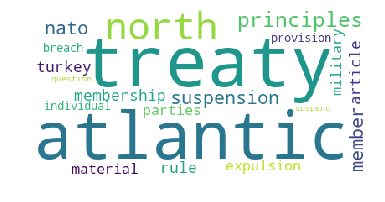

In [139]:
draw_wordcloud(lda,4)

<h4>Roughly,</h4>
<li>lda looks for candidate topics assuming that there are many such candidates
<li>looks for words related to the candidate topics
<li>assign probablilites to those words

<h2>Understanding topics</h2>
<li>pyLDAvis (package for visualizing the results of an LDA)
<li>Shows topic distance between topics and top words in the corpus

In [47]:
!pip install pyLDAvis

You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
# pp.pprint(lda.print_topics(num_words=8))

In [115]:

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

<h1>Similarity</h1>
<h2>Given a corpus of documents, when a new document arrives, find the document that is the most similar</h2>

In [154]:
doc_list = [community_data,le_monde_data,fiveguys_data,shakeshack_data]
all_text = community_data.raw() + le_monde_data.raw() + fiveguys_data.raw() + shakeshack_data.raw()

documents = [doc.raw() for doc in doc_list]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [88]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


In [162]:
index[lsi[corpus[0]]]

array([1.        , 0.96409273, 0.52242893, 0.28886598], dtype=float32)

In [56]:
doc="""
Came to have lunch & also watch the World Cup match. I've been here many times before and not much has changed. 

You can get half off apps and bogo drinks when you sign up for their brew club. I tried their IPA 
(was not a fan).  We also ordered the backyarder and the hot mess burgers with a 
side of disco fries to share. Both were delicious and cooked perfectly. The fries were also really good - 
the gravy and the cheese mix worked perfectly. 

Service was not the best but it could have been because of how packed the bar was for the game. Still a 
solid option in the neighborhood. Should mention that the fried Oreos are out of this world!
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(2, 0.9371457), (1, 0.92266124), (3, 0.8178723), (0, 0.7871257)]